In [1]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(100, 4) (100,)


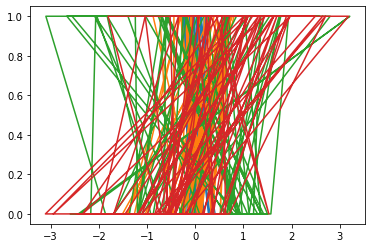

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y)

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Ejemplo con Kfold, no usa los datos anteriores, es solo un ejemplo

In [5]:
#Example Kfold:

X_train_example = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y_train_example = np.array([[1], [3], [1], [3]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=4, n_repeats=1, random_state=random_state)
for train in rkf.split(X=X_train_example):
    # Izquierda -- Conjuntos de entrenamiento por iteración
    # Derecha -- Conjuntos de validación por iteración
    # n_repeats -- Representa el número de batches que van a ocurrir durante nuestro entrenamiento
    print(train)

(array([1, 2, 3]), array([0]))
(array([0, 2, 3]), array([1]))
(array([0, 1, 3]), array([2]))
(array([0, 1, 2]), array([3]))


### Con un solo batch

In [6]:
from sklearn.model_selection import KFold

# define the model
model = RandomForestClassifier()
# evaluate the model 
# THIS DOESN'T TRAIN THE MODEL
k_fold = KFold(n_splits=10, random_state=2)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[0.75  0.875 0.75  0.5   0.625 0.75  0.875 0.875 0.75  0.75 ]
Accuracy: 0.750 (0.112)


In [7]:
74.7 % +- 7.8%

SyntaxError: invalid syntax (<ipython-input-7-3598b95ebee3>, line 1)

In [8]:
74.7 + 7.8

82.5

In [9]:
74.7 - 7.8

66.9

In [10]:
[82.5, 66.9]

[82.5, 66.9]

TRAINING

In [11]:
k_fold = KFold(n_splits=33, random_state=1)
val_score = []
train_score = []
# define the model
model = RandomForestClassifier()
for train, val in k_fold.split(X_train):
    # train the model
    model.fit(X_train[train], y_train[train])
    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)

[0.6666666666666666,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.6666666666666666,
 0.3333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.5,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 0.5]

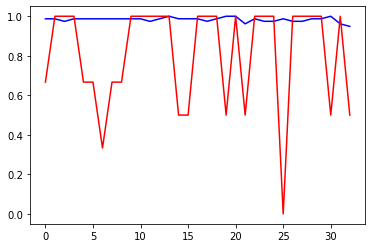

In [12]:
plt.plot(train_score, color="b")
plt.plot(val_score, color="r")
val_score

In [13]:
model.score(X_test, y_test)

0.9

ONE LINE

In [14]:
k_fold = KFold(n_splits=4, random_state=1)

[model.fit(X_train[train], y_train[train]).score(X_train[val], y_train[val]) for train, val in k_fold.split(X_train)]

[0.8, 0.6, 0.9, 0.9]

### Con 3 batches

In [15]:
# define the model
model_batches = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=2)
n_scores = cross_val_score(model_batches, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.801 (0.134)


### To predict

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [17]:
model.score(X=X_test, y=y_test)

0.9